<a href="https://colab.research.google.com/github/melisapuspita/TransformerNEW/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving coba.csv to coba.csv


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/10, Loss: 0.6750, Test Accuracy: 0.6750
Epoch 2/10, Loss: 0.6366, Test Accuracy: 0.6750
Epoch 3/10, Loss: 0.6494, Test Accuracy: 0.6750
Epoch 4/10, Loss: 0.6393, Test Accuracy: 0.6750
Epoch 5/10, Loss: 0.6438, Test Accuracy: 0.6750
Epoch 6/10, Loss: 0.6384, Test Accuracy: 0.6750
Epoch 7/10, Loss: 0.6316, Test Accuracy: 0.6750
Epoch 8/10, Loss: 0.6411, Test Accuracy: 0.6750
Epoch 9/10, Loss: 0.6401, Test Accuracy: 0.6750
Epoch 10/10, Loss: 0.6384, Test Accuracy: 0.6750


,Epoch,Training Loss,Test Accuracy
0,1,0.675016,0.675
1,2,0.636581,0.675
2,3,0.649407,0.675
3,4,0.639280,0.675
4,5,0.643773,0.675
5,6,0.638433,0.675
6,7,0.631572,0.675
7,8,0.641131,0.675
8,9,0.640134,0.675
9,10,0.638388,0.675


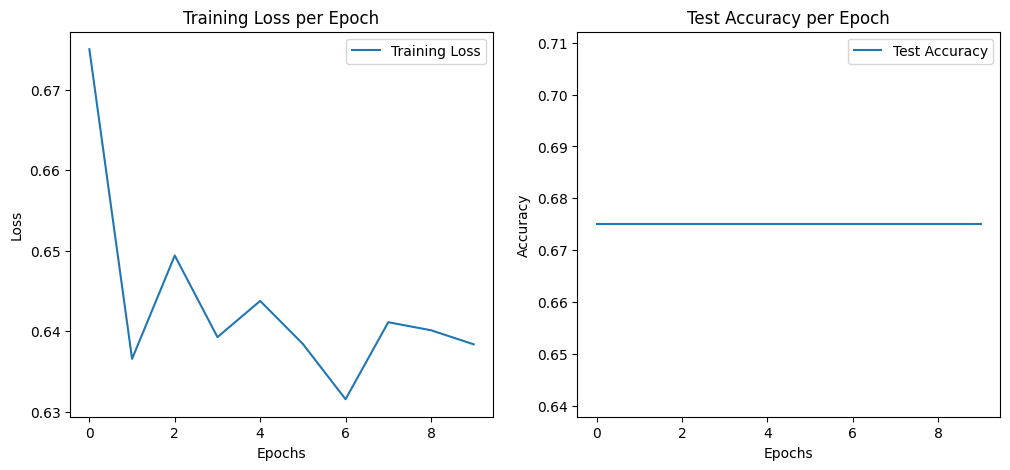

from matplotlib import pyplot as plt
epoch_df['Epoch'].plot(kind='hist', bins=20, title='Epoch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
epoch_df['Training Loss'].plot(kind='hist', bins=20, title='Training Loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
epoch_df.plot(kind='scatter', x='Epoch', y='Training Loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Epoch']
  ys = series['Training Loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = epoch_df.sort_values('Epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Epoch')
_ = plt.ylabel('Training Loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Epoch']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Epoch'}, axis=1)
              .sort_values('Epoch', ascending=True))
  xs = counted['Epoch']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = epoch_df.sort_values('Epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Epoch')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Test Accuracy']
  ys = series['Training Loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = epoch_df.sort_values('Test Accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Test Accuracy')
_ = plt.ylabel('Training Loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Test Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Test Accuracy'}, axis=1)
              .sort_values('Test Accuracy', ascending=True))
  xs = counted['Test Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = epoch_df.sort_values('Test Accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Test Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
epoch_df['Epoch'].plot(kind='line', figsize=(8, 4), title='Epoch')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
epoch_df['Training Loss'].plot(kind='line', figsize=(8, 4), title='Training Loss')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import files

# Upload file CSV
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Mengambil nama file pertama yang diunggah

# Load data
data = pd.read_csv(file_name)

# Label encoding
label_encoder_can_id = LabelEncoder()
label_encoder_flag = LabelEncoder()

data['CAN ID'] = label_encoder_can_id.fit_transform(data['CAN ID'])
data['Flag'] = label_encoder_flag.fit_transform(data['Flag'])

# Convert hexadecimal-like values safely
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0).astype(int)
        except ValueError:
            print(f"Warning: Could not convert column '{col}' to numeric. Skipping...")

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Flag']).values  # Hapus kolom target
y = data['Flag'].values  # Ambil kolom target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert ke tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# DataLoader
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Transformer Model
class SimpleTransformer(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)
        self.transformer_layer = nn.TransformerEncoderLayer(d_model=64, nhead=4)
        self.transformer = nn.TransformerEncoder(self.transformer_layer, num_layers=2)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Transformer expects (batch, seq_len, features)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        x = self.fc(x)
        return x

# Model setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_dim = X_train_tensor.shape[1]
num_classes = len(np.unique(y))
model = SimpleTransformer(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
train_losses = []
test_accuracies = []
epoch_data = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    model.eval()
    y_pred = []
    with torch.no_grad():
        for X_batch, _ in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().tolist())

    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    epoch_data.append({'Epoch': epoch + 1, 'Training Loss': avg_loss, 'Test Accuracy': accuracy})
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Display results
epoch_df = pd.DataFrame(epoch_data)
display(epoch_df)

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy per Epoch')
plt.legend()

plt.show()
